In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/football.csv')

In [3]:
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [4]:
print("No. of players who are in attacking position (contribution_type = 1): " + str(len(df[df['contribution_type'] == 1])))

No. of players who are in attacking position (contribution_type = 1): 3546


In [5]:
print("No. of players who are in defending position (contribution_type = 0): " + str(len(df[df['contribution_type'] == 0])))

No. of players who are in defending position (contribution_type = 0): 4226


In [6]:
df.isna().sum()

sofifa_id                     0
short_name                    0
overall                       0
potential                     0
value_eur                    66
                           ... 
goalkeeping_kicking           0
goalkeeping_positioning       0
goalkeeping_reflexes          0
goalkeeping_speed          7063
contribution_type             0
Length: 66, dtype: int64

In [7]:
df.drop(axis = "columns", labels = ["goalkeeping_speed", "short_name", "value_eur", "wage_eur",
                                          "age", "height_cm", "weight_kg", "club_team_id", "club_name",
                                          "league_name", "league_level", "club_jersey_number", "nation_jersey_number",
                                          "preferred_foot", "weak_foot", "body_type", "release_clause_eur", "player_tags",
                                          "player_traits", "work_rate"], inplace = True)

In [8]:
df.isna().sum()

sofifa_id                        0
overall                          0
potential                        0
skill_moves                      0
international_reputation         0
pace                           709
shooting                       709
passing                        709
dribbling                      709
defending                      709
physic                         709
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina       

Now as we can see there are 6 columns with same no. of null rows. This is strange chances can be these unfilled rows can be of goalkeepers(Just a intution) because columns like shooting, dribbling and defending are NaN. So I'll fill these unfilled rows with median as I have did in the first question(Linear Regression). Also if these rows belong to goalkeepers then they also have play a crucial role in our model.

In [9]:
df["pace"].fillna(df["pace"].median(), inplace = True)

In [10]:
df["shooting"].fillna(df["shooting"].median(), inplace = True)

In [11]:
df["passing"].fillna(df["passing"].median(), inplace = True)

In [12]:
df["dribbling"].fillna(df["dribbling"].median(), inplace = True)

In [13]:
df["defending"].fillna(df["defending"].median(), inplace = True)

In [14]:
df["physic"].fillna(df["physic"].median(), inplace = True)

In [15]:
df.isna().sum()

sofifa_id                      0
overall                        0
potential                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long

Still there are some columns that needs to be dropped as they won't necessarily determine the contribution_type of the player.


In [16]:
df.drop(axis = "columns", labels = ["sofifa_id", "overall", "potential", "skill_moves", "international_reputation"], inplace = True)

In [18]:
features=list(df.columns[:-1])

In [19]:
x = df[features]
y = df['contribution_type']

Defining Sigmoid function

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         x, y, test_size=0.2, random_state=2)

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_train = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_train]
        return class_pred

In [42]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [64]:
lr = LogisticRegression(lr = 0.01)
lr.fit(X_train, y_train)

In [65]:
y_pred = lr.predict(X_test)

In [66]:
acc = accuracy(y_pred, y_test)

In [67]:
print(acc)

0.822508038585209


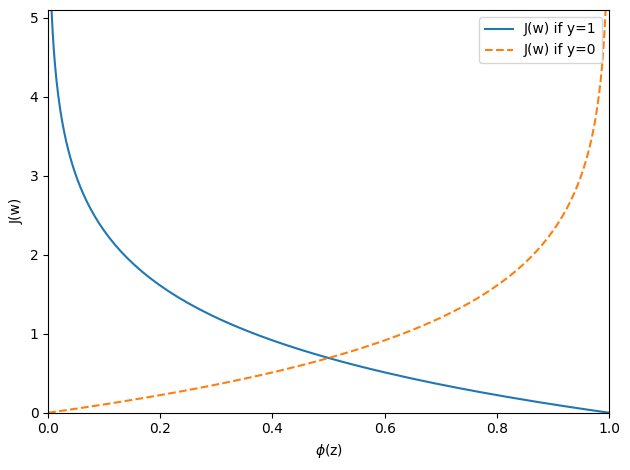

In [69]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[[596 244]
 [ 32 683]]


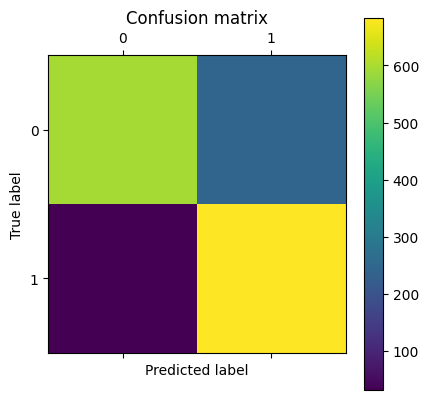

In [72]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

print(f1)

0.8319123020706456
